In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, MinMaxScaler
from scipy.sparse import coo_matrix, csr_matrix
%matplotlib inline
import os 

In [2]:
os.chdir("/Users/sanyas/Desktop/projects")

In [3]:
df_1 = pd.read_csv("Norway_Stan.csv")
df_well = pd.read_csv("Norway.csv")
#Merge the 2 CSVs by Name
df_merged = df_well.merge(df_1, how = "left", on = "Name")
print(df_merged.head())
# merge both the Norway standardized information and given Norway

   Unnamed: 0_x    Name               Surface        X_x         Y_x       Z  \
0         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
1         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
2         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
3         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
4         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   

       MD  Geological age  TVT  TST  ... Unnamed: 34  Unnamed: 35  \
0  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
1  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
2  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
3  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
4  1382.0            4.21  NaN  NaN  ...         NaN          NaN   

   Unnamed: 36  Unnamed: 37  Unnamed: 0_y        X_y         Y_y  \
0          NaN          NaN         

In [4]:
df_merged.head()

,Unnamed: 0_x,Name,Surface,X_x,Y_x,Z,MD,Geological age,TVT,TST,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 0_y,X_y,Y_y,True Vertical Depth,Normalized TVD,Formation
0,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,0,628531.41,6394710.62,-23025.90,0.112166,-1.215791
1,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,1,628531.41,6394710.62,-23010.90,0.112748,-1.176869
2,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,2,628531.47,6394710.62,-23037.90,0.111701,-1.137946
3,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,3,628531.50,6394710.61,-23061.90,0.110770,-1.099024
4,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,4,628531.27,6394713.59,-23910.88,0.077844,-1.060102


In [5]:
labels = df_merged['Name'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
df_merged.replace({'Name': mapping},inplace=True)
# change name to a numerical values to easier identification

In [6]:
mapping

{'10/4-1': 0,
 '10/5-1': 1,
 '10/7-1': 2,
 '10/8-1': 3,
 '11/10-1': 4,
 '11/5-1': 5,
 '11/9-1': 6,
 '15/12-1': 7,
 '15/12-10 S': 8,
 '15/12-11 S': 9,
 '15/12-12': 10,
 '15/12-13': 11,
 '15/12-13 A': 12,
 '15/12-13 B': 13,
 '15/12-14': 14,
 '15/12-15': 15,
 '15/12-16 S': 16,
 '15/12-17 A': 17,
 '15/12-17 S': 18,
 '15/12-18 A': 19,
 '15/12-18 S': 20,
 '15/12-19': 21,
 '15/12-2': 22,
 '15/12-20 S': 23,
 '15/12-21': 24,
 '15/12-21 A': 25,
 '15/12-22': 26,
 '15/12-23': 27,
 '15/12-23 A': 28,
 '15/12-24 S': 29,
 '15/12-3': 30,
 '15/12-3 T2': 31,
 '15/12-4': 32,
 '15/12-5': 33,
 '15/12-6 S': 34,
 '15/12-6 ST2': 35,
 '15/12-7 S': 36,
 '15/12-8': 37,
 '15/12-8 A': 38,
 '15/12-9 ST2': 39,
 '15/2-1': 40,
 '15/3-1 S': 41,
 '15/3-1 ST2': 42,
 '15/3-2': 43,
 '15/3-2 R': 44,
 '15/3-3': 45,
 '15/3-4': 46,
 '15/3-5': 47,
 '15/3-6': 48,
 '15/3-7': 49,
 '15/3-8': 50,
 '15/3-9': 51,
 '15/3-9 T2': 52,
 '15/5-1': 53,
 '15/5-2': 54,
 '15/5-3': 55,
 '15/5-4': 56,
 '15/5-5': 57,
 '15/5-6': 58,
 '15/5-7': 59,
 

In [7]:
df_merged

,Unnamed: 0_x,Name,Surface,X_x,Y_x,Z,MD,Geological age,TVT,TST,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 0_y,X_y,Y_y,True Vertical Depth,Normalized TVD,Formation
0,21675,0,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,0,628531.41,6394710.62,-23025.90,0.112166,-1.215791
1,21675,0,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,1,628531.41,6394710.62,-23010.90,0.112748,-1.176869
2,21675,0,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,2,628531.47,6394710.62,-23037.90,0.111701,-1.137946
3,21675,0,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,3,628531.50,6394710.61,-23061.90,0.110770,-1.099024
4,21675,0,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,4,628531.27,6394713.59,-23910.88,0.077844,-1.060102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484299,18872,1099,HORDALAND GP. Top,580466.31,6356474.78,-537.5,568.0,13.00,NaN,NaN,...,NaN,NaN,NaN,NaN,21671,580466.31,6356474.78,-20080.50,0.226400,-0.631959
484300,18872,1099,HORDALAND GP. Top,580466.31,6356474.78,-537.5,568.0,13.00,NaN,NaN,...,NaN,NaN,NaN,NaN,21672,580466.31,6356474.78,-18944.50,0.270458,-0.593036
484301,18872,1099,HORDALAND GP. Top,580466.31,6356474.78,-537.5,568.0,13.00,NaN,NaN,...,NaN,NaN,NaN,NaN,21673,580466.31,6356474.78,-20622.50,0.205379,-0.554114
484302,18872,1099,HORDALAND GP. Top,580466.31,6356474.78,-537.5,568.0,13.00,NaN,NaN,...,NaN,NaN,NaN,NaN,21674,580466.31,6356474.78,-20662.50,0.203828,-0.515192


In [8]:
df_merged['True Vertical Depth'] = df_merged['True Vertical Depth'] - df_merged['True Vertical Depth'].min()
# this normalizes the true vertical depth that is in df merged

In [9]:
def sample_splitter(df_merged, fraction, random_seed):
    test = df_merged.sample(frac=fraction, random_state=random_seed)
    test_idx = test.index.values
    train =  df_merged.drop(test_idx)
    return train, test
# Seperates data to training and testing 

In [10]:
train, test = sample_splitter(df_merged, 0.2, 86)

In [11]:
print(f'Training size is {len(train)} tops, and test size is {len(test)} tops') #use the training data 

Training size is 387443 tops, and test size is 96861 tops


In [12]:
D_df = df_merged.pivot_table('True Vertical Depth',"Formation","Name").fillna(0)
df_merged[["True Vertical Depth", "Formation", "Name"]] #create a pivot table

,True Vertical Depth,Formation,Name
0,2892.10,-1.215791,0
1,2907.10,-1.176869,0
2,2880.10,-1.137946,0
3,2856.10,-1.099024,0
4,2007.12,-1.060102,0
...,...,...,...
484299,5837.50,-0.631959,1099
484300,6973.50,-0.593036,1099
484301,5295.50,-0.554114,1099
484302,5255.50,-0.515192,1099


In [13]:
D_df

Name,0,1,2,3,4,5,6,7,8,9,...,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099
Formation,,,,,,,,,,,,,,,,,,,,,
-1.215791,2892.10,4073.0,11236.12,3308.0,5606.65,4450.07,0.0,21744.44,21541.85,21544.0,...,8552.050,8345.24,6506.31,6284.11,5674.0,5448.0,5506.0,5564.0,5443.05,5448.5
-1.176869,2907.10,4067.0,0.00,3319.0,5593.65,0.00,0.0,21731.44,21533.85,21537.0,...,8541.050,8350.24,6499.31,0.00,5690.0,5446.0,5508.0,5570.0,0.00,5456.5
-1.137946,2880.10,4031.0,0.00,3303.0,0.00,4400.09,0.0,0.00,0.00,0.0,...,8525.410,8300.65,6478.32,6292.11,5673.0,5421.0,5470.0,5522.0,0.00,0.0
-1.099024,2856.10,3981.0,0.00,3185.0,5593.65,4110.11,0.0,0.00,21523.63,21544.0,...,8420.670,8250.06,6387.34,6185.13,5645.0,5399.0,5392.0,5409.0,0.00,5388.5
-1.060102,2007.12,3635.0,10730.19,0.0,0.00,3549.12,0.0,21606.45,21360.97,21380.0,...,6961.305,6886.74,5575.75,4703.39,5201.0,4909.0,4974.0,4704.0,4747.11,5147.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.871034,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
2.909956,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
2.948878,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0


In [14]:
df_merged['True Vertical Depth'] = df_merged['True Vertical Depth'] - df_merged['True Vertical Depth'].min()
#standardize the TVD values

In [15]:
R = D_df.values
well_depth_mean = np.mean(R, axis=1) #mean depth in each well
R_demeaned = R - well_depth_mean.reshape(-1, 1)

In [16]:
from sklearn.preprocessing import binarize
A = binarize(R)

In [17]:
def runALS(A, R, n_factors, n_iterations, lambda_):
    """
    Runs Alternating Least Squares algorithm in order to calculate matrix.
    :param A: User-Item Matrix with ratings
    :param R: User-Item Matrix with 1 if there is a rating or 0 if not
    :param n_factors: How many factors each of user and item matrix will consider
    :param n_iterations: How many times to run algorithm
    :param lambda_: Regularization parameter
    :return:
    """
    print("Initiating ")
    MAE = []
    for i in range(1, n_factors):
        lambda_ = lambda_
        n_factors = i
        n, m = A.shape
        n_iterations = n_iterations
        Users = 5 * np.random.rand(n, n_factors)
        Items = 5 * np.random.rand(n_factors, m)

        def get_error(A, Users, Items, R):
            # This calculates the MSE of nonzero elements
            return np.sum((R * (A - np.dot(Users, Items))) ** 2) / np.sum(R)

        MSE_List = []

        print("Starting Iterations")
        for iter in range(n_iterations):
            for i, Ri in enumerate(R):
                Users[i] = np.linalg.solve(
                    np.dot(Items, np.dot(np.diag(Ri), Items.T))
                    + lambda_ * np.eye(n_factors),
                    np.dot(Items, np.dot(np.diag(Ri), A[i].T)),
                    ).T
            print(
                "Error after solving for User Matrix:",
                get_error(A, Users, Items, R),
                )

            for j, Rj in enumerate(R.T):
                Items[:, j] = np.linalg.solve(
                    np.dot(Users.T, np.dot(np.diag(Rj), Users))
                    + lambda_ * np.eye(n_factors),
                    np.dot(Users.T, np.dot(np.diag(Rj), A[:, j])),
                    )
            print(
                "Error after solving for Item Matrix:",
                 get_error(A, Users, Items, R),
                )

            MSE_List.append(get_error(A, Users, Items, R))
            print("%sth iteration is complete..." % iter)
        MAE.append(MSE_List)
    return Users, Items, MAE

In [18]:
U, Vt, M_list = runALS(R, A, 20, 5, 0.1) #initialize ALS

Initiating 
Starting Iterations
Error after solving for User Matrix: 85172068.04462406
Error after solving for Item Matrix: 2156536.6589194816
0th iteration is complete...
Error after solving for User Matrix: 588402.4278456774
Error after solving for Item Matrix: 323281.1242888484
1th iteration is complete...
Error after solving for User Matrix: 284416.3699932488
Error after solving for Item Matrix: 277515.18309250823
2th iteration is complete...
Error after solving for User Matrix: 276285.7886889325
Error after solving for Item Matrix: 276014.013612768
3th iteration is complete...
Error after solving for User Matrix: 275928.89460462367
Error after solving for Item Matrix: 275907.834970325
4th iteration is complete...
Starting Iterations
Error after solving for User Matrix: 63938566.636925384
Error after solving for Item Matrix: 1261930.0546720005
0th iteration is complete...
Error after solving for User Matrix: 306399.0409416147
Error after solving for Item Matrix: 135196.7471290541
1

Error after solving for User Matrix: 20688.660925763557
Error after solving for Item Matrix: 11521.791835995673
2th iteration is complete...
Error after solving for User Matrix: 8350.391454790515
Error after solving for Item Matrix: 5819.602830191121
3th iteration is complete...
Error after solving for User Matrix: 4763.032743749244
Error after solving for Item Matrix: 3848.5793660479508
4th iteration is complete...
Starting Iterations
Error after solving for User Matrix: 40874731.227058195
Error after solving for Item Matrix: 130327.81660979465
0th iteration is complete...
Error after solving for User Matrix: 64417.89991158042
Error after solving for Item Matrix: 24392.80862445363
1th iteration is complete...
Error after solving for User Matrix: 14387.244008032458
Error after solving for Item Matrix: 7623.760462250135
2th iteration is complete...
Error after solving for User Matrix: 5552.240800679816
Error after solving for Item Matrix: 3861.469562752784
3th iteration is complete...
E

In [19]:
recommendations = np.dot(U, Vt)
recsys = pd.DataFrame(data = recommendations[0:, 0:], index = D_df.index,
                        columns = D_df.columns)
recsys.head() #create a dataframe of recommendations

Name,0,1,2,3,4,5,6,7,8,9,...,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099
Formation,,,,,,,,,,,,,,,,,,,,,
-1.215791,2903.162952,4072.097530,11236.123418,3346.732993,5606.904060,4450.066421,2784.321901,21720.510033,21540.364729,21510.085656,...,8545.400446,8351.454740,6507.115506,6284.302371,5671.633954,5452.018508,5527.369471,5580.372106,5443.284623,5448.696390
-1.176869,2893.153712,4139.464114,11180.698618,3282.089754,5593.174126,4366.748556,2819.863441,21767.956752,21536.269487,21525.649513,...,8553.947258,8344.462964,6497.231811,6078.379106,5685.739839,5441.659790,5486.988531,5552.287656,5899.703936,5457.006262
-1.137946,2873.923824,4009.129452,9670.442168,3305.089781,1541.181983,4400.089073,3068.205945,27408.068113,18267.009395,22852.683908,...,8530.817176,8297.876436,6477.409014,6293.153978,5671.343485,5421.584369,5468.112152,5522.408205,5765.052037,2195.838752
-1.099024,2870.864935,3964.816609,10016.897774,3180.440554,5593.875471,4110.113756,2910.350053,23860.153802,21523.212883,21580.306625,...,8407.207460,8255.786247,6389.841311,6182.969133,5651.775673,5398.278592,5397.515315,5408.459823,5787.453650,5387.968926
-1.060102,2007.321182,3632.427752,10730.189705,8071.118121,-11688.073933,3549.120219,4602.798292,21598.363203,21361.024683,21356.750811,...,6961.501290,6886.810568,5575.767503,4702.978080,5201.045920,4909.254140,4974.944708,4704.209194,4747.077080,5147.464413


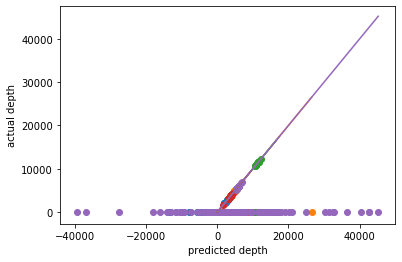

In [21]:
for i in range(5):
    plt.scatter(recsys.iloc[0:, i].values, D_df.iloc[0:, i].values) #plot predicted vs actual
    plt.xlabel('predicted depth')
    plt.ylabel('actual depth')
    plt.plot(np.arange(0,recsys.iloc[0:,i].max()))
    #graph shows predictions compared to the actual

In [22]:
newDF = recsys.T
newDF.reset_index(inplace=True) # convert the recsys to how test data looked

In [23]:
newDF

Formation,Name,-1.215790665784773,-1.176868528626274,-1.1379463914677752,-1.0990242543092763,-1.0601021171507774,-1.0211799799922785,-0.9822578428337796,-0.9433357056752808,-0.904413568516782,...,2.676423050065115,2.7153451872236136,2.7542673243821127,2.7931894615406114,2.8321115986991106,2.871033735857609,2.9099558730161084,2.948878010174607,2.9878001473331057,3.0267222844916053
0,0,2903.162952,2893.153712,2873.923824,2870.864935,2007.321182,1976.962915,2010.284675,3682.728680,3690.561051,...,-5418.007521,-1752.069199,-1486.315099,-716.606925,32.072420,1573.427226,-1951.857556,-1749.716955,-39.871057,-2994.850489
1,1,4072.097530,4139.464114,4009.129452,3964.816609,3632.427752,3620.845624,3649.233916,4578.375296,4787.303117,...,691.088231,1343.951667,1201.970132,1438.812814,46.178298,5316.443186,764.016683,3313.642446,640.398236,1865.991068
2,2,11236.123418,11180.698618,9670.442168,10016.897774,10730.189705,10623.200027,10724.190117,11479.997139,11778.864916,...,8679.909232,1472.888665,1253.049526,3270.960492,-22.879076,8234.726116,269.010223,8831.261061,26.823933,394.231615
3,3,3346.732993,3282.089754,3305.089781,3180.440554,8071.118121,9382.936763,6627.975838,3844.784829,3847.067139,...,2755.645858,33.092428,31.797464,1379.763971,3.655148,4159.669104,40.010324,4982.057973,34.733078,190.437626
4,4,5606.904060,5593.174126,1541.181983,5593.875471,-11688.073933,-39393.851038,-36672.454575,6052.994825,6050.520580,...,17579.470763,-2381.932380,-2205.420210,-7360.899356,-167.790157,-5262.972652,-9.640840,-13024.306494,9204.112977,7769.780005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,5452.018508,5441.659790,5421.584369,5398.278592,4909.254140,4850.149680,4898.113290,6066.265523,6060.184693,...,4603.599548,310.096413,247.620936,551.036295,-23.340209,4135.340059,324.940745,4030.591116,960.787303,547.535930
1096,1096,5527.369471,5486.988531,5468.112152,5397.515315,4974.944708,4961.732032,4969.228571,6158.919669,6174.984948,...,5328.163138,246.355633,196.810689,1054.381840,-18.441227,3703.067212,426.714712,4158.402483,1031.231984,668.994697
1097,1097,5580.372106,5552.287656,5522.408205,5408.459823,4704.209194,4586.734806,4682.102567,6171.870768,6146.472997,...,5769.389274,331.493161,272.466632,1198.119492,-16.073315,3586.228290,566.378493,4324.577025,912.776608,706.975819
1098,1098,5443.284623,5899.703936,5765.052037,5787.453650,4747.077080,4663.178683,4751.069170,6184.104728,6203.965579,...,5734.286484,597.874122,477.707887,799.401078,-44.670899,3502.681493,567.652336,4581.334281,540.442534,893.191500


In [24]:
flat_preds = pd.DataFrame(recsys.unstack()).reset_index() #this flattens the list of predictions
#now combine the flattened predictions with the test dataset, merged on API and Formation
new_df = pd.merge(test, flat_preds,  how='left', left_on=['Name','Formation'], right_on = ['Name','Formation'])

In [25]:
new_df

,Unnamed: 0_x,Name,Surface,X_x,Y_x,Z,MD,Geological age,TVT,TST,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 0_y,X_y,Y_y,True Vertical Depth,Normalized TVD,Formation,0
0,10700,930,Cook Fm. Top,529621.13,6766782.05,-2810.00,2835.0,188.0,NaN,NaN,...,NaN,NaN,NaN,18175,529621.13,6766782.05,12314.00,0.477583,1.820136,12394.362439
1,2367,621,Johansen Mb. Top,527834.79,6747076.61,-2101.00,2126.0,192.0,NaN,NaN,...,NaN,NaN,NaN,12201,527834.79,6747076.61,21333.00,0.827374,1.820136,21332.996361
2,11590,980,Utsira Fm. Top,536102.11,6793048.63,-613.99,643.0,0.0,NaN,NaN,...,NaN,NaN,NaN,19312,536106.28,6793047.01,13019.03,0.504927,-0.670881,12962.999174
3,21098,595,VIKING GP. Top,517128.07,6742830.67,-2025.87,2051.0,137.2,NaN,NaN,...,NaN,NaN,NaN,11835,517127.01,6742834.58,3047.09,0.118178,-0.709803,3033.527488
4,9430,370,Balder Fm. Top,474815.22,6624835.98,-2122.55,2148.0,53.0,NaN,NaN,...,NaN,NaN,NaN,7377,474823.98,6624851.53,13265.43,0.514483,-1.060102,13253.702345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96856,1972,41,Ekofisk Fm. Top,426161.01,6524110.10,-2690.00,2715.0,0.0,NaN,NaN,...,NaN,NaN,NaN,861,426161.01,6524110.10,20797.00,0.806585,0.924927,20806.348708
96857,13806,951,Aasgard Fm. Top,548099.60,6851989.76,-3606.00,3639.0,117.0,NaN,NaN,...,NaN,NaN,NaN,18584,548099.60,6851989.76,8278.00,0.321052,0.146484,8330.870062
96858,9183,759,VIKING GP. Top,461726.79,6764528.76,-3794.13,3960.0,137.2,NaN,NaN,...,NaN,NaN,NaN,14686,461297.94,6763994.53,16597.00,0.643694,-0.593036,16569.337156
96859,20075,1009,Roedby Fm. Top,475333.50,6319689.19,-4711.61,4995.0,98.9,NaN,NaN,...,NaN,NaN,NaN,19804,475871.17,6319485.12,2434.08,0.094403,-0.904414,2435.432970


In [27]:
new_df = new_df[['Name','Formation','True Vertical Depth', 0]] #Create a new dataframe that is easier to read

In [28]:
new_df.rename(columns={0:'TVD_pred'}, inplace=True)
new_df.rename(columns={"True Vertical Depth":'TVD'}, inplace=True)
cleanDF = new_df
cleanDF['signed_error'] = (cleanDF['TVD'] - cleanDF['TVD_pred'])# clean df is a new data frame with differences between the actual and predicted

/opt/anaconda3/envs/energyanalytics/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/opt/anaconda3/envs/energyanalytics/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [31]:
cleanDF.head()

,Name,Formation,TVD,TVD_pred,signed_error
0,930,1.820136,12314.00,12394.362439,-80.362439
1,621,1.820136,21333.00,21332.996361,0.003639
2,980,-0.670881,13019.03,12962.999174,56.030826
3,595,-0.709803,3047.09,3033.527488,13.562512
4,370,-1.060102,13265.43,13253.702345,11.727655


In [34]:
from sklearn.metrics import median_absolute_error as MAE
print(MAE(cleanDF.TVD.values, cleanDF.TVD_pred.values))
# apply the median-absolute error

4.765989390792583
